<a href="https://colab.research.google.com/github/Dinamo597/IA_2025/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio 1 Clusterización
Clase 12/11/25
Data: Analisis.

Analizar el archivo analisis.sv, en donde se evalua a la luz del "Ocean:The Big five" aspectos de la personalidad de diferentes figuras públicas en X

* Usuario: el nombre de la figura públicaen X
* "op": Openness to experience
* "co": Concientiousness (que tan
* "ex": extraversion (
* "ag": agreebleness (temperamento, que tan empatico)
* "ne": Neuroticism (que tato se critica, que tan seguro esta de si mismo)
* worcount: la cantidad de palabras promedio usadas en los tweets
* Categoria: Actividad laboral del usuario

###Categorias
1. Actor /Actríz
2. Cantante
3. Modelo
4. TV, series
5. Radio
6. Tecnología
7. Deportes
8. Política
9. Escritores

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans # calcula centroides y clusterización
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"]=(16,9)
plt.style.use("ggplot")

In [ ]:
dataframe=pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [ ]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [ ]:
dataframe.groupby("categoria").size()

,0
categoria,
1,27
2,34
3,9
4,19
5,4
6,8
7,17
8,16
9,6


##Visualización de datos


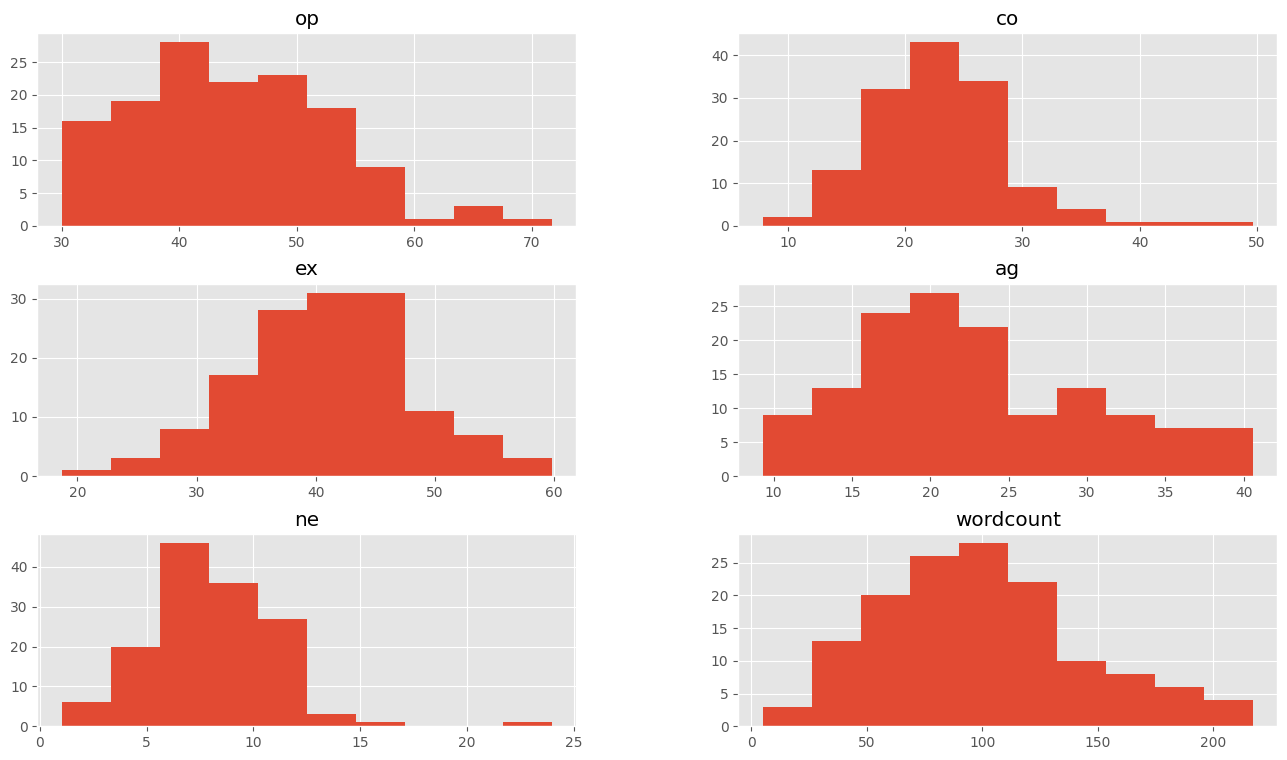

In [ ]:
dataframe.drop(columns=["categoria"]).hist()
plt.show()

Se seleccionará como dimensiones op,ex y ag. Se cruzará con el fin de encontrar alguna

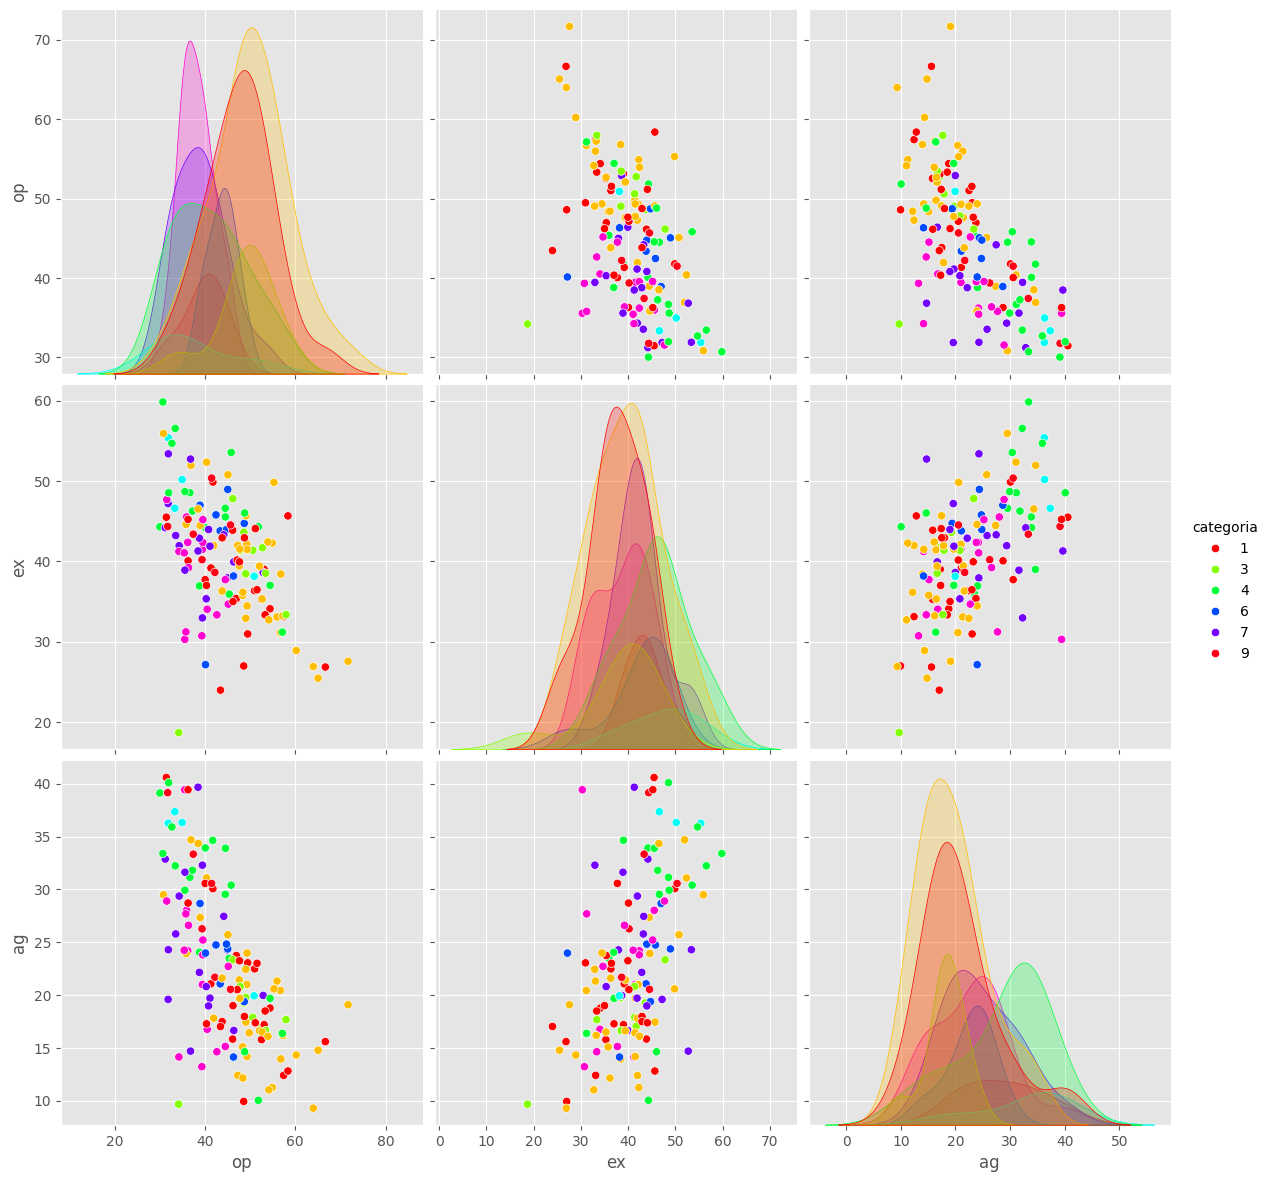

In [ ]:
sb.pairplot(dataframe.dropna(),hue="categoria", height=4, vars=["op","ex","ag"],kind="scatter", palette="hsv")

Revisando la gráfica, no se observa ningún tipo de agrupación de correlación entre los usuarios y sus categorias  

##Definición de entrada
Se conecta la estructura de datos que se empleará para alimentar el algoritmo. Se cargan las columnas op, ex y ag en la variable X

In [ ]:
X=np.array(dataframe[["op","ex","ag"]])
y=np.array(dataframe["categoria"])
X.shape


(140, 3)

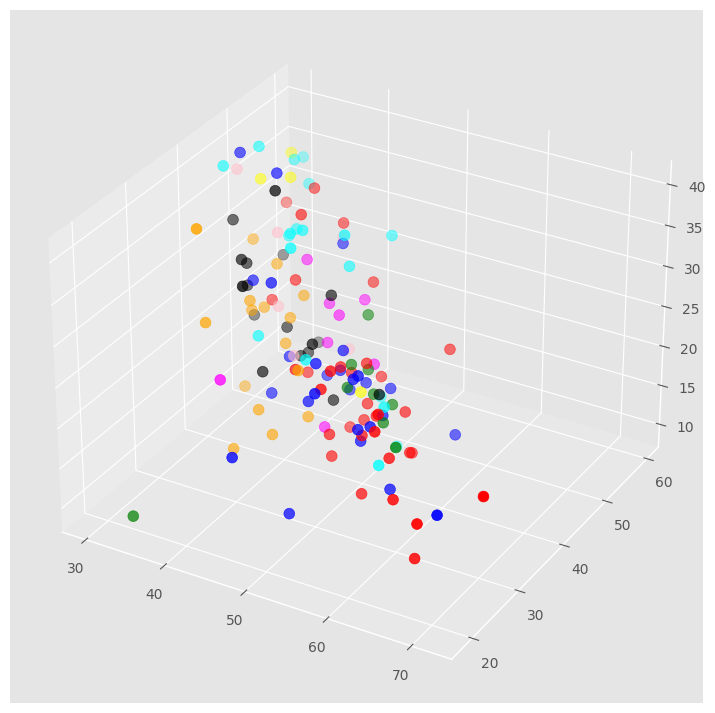

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
colores=["blue","red","green","cyan","yellow","magenta","black","orange","pink"]
asignar=[]
for row in y:
  asignar.append(colores[row-1]) # Corrected: subtract 1 from row
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
plt.show()

##1. Obtener la cantidad de centroide - Obtener el valor de K
Se empleará la metodología del "punto de codo" para hallar la cantidad de centroides

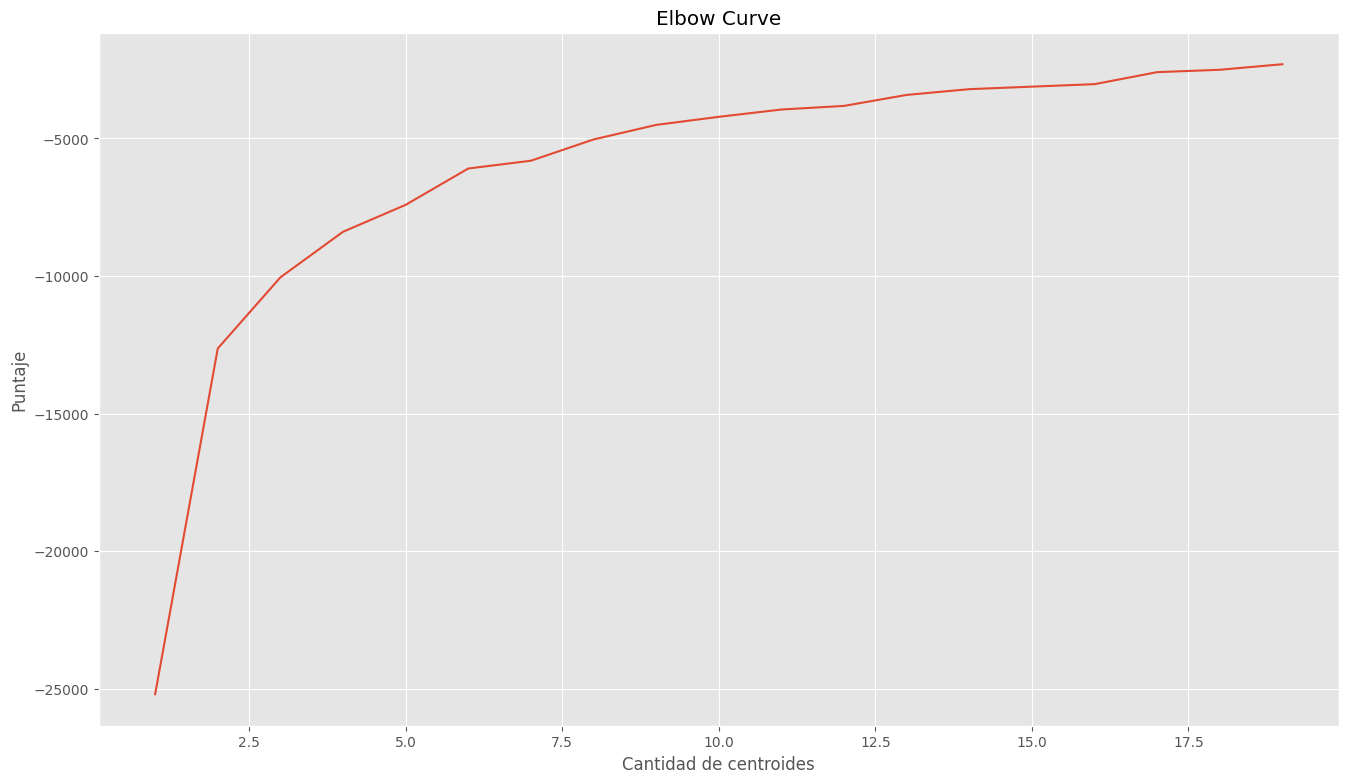

In [ ]:
Nc=range(1,20)
kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans
score=[kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Cantidad de centroides")
plt.ylabel("Puntaje")
plt.title("Elbow Curve")
plt.show()

Debido a lo observado se elige a K = 5 porque a partir de ese punto la curva es suave

##2 Ejecución de K-MEAN
Obtener la ubicación de los 5 centroides.

In [ ]:
kmeans=KMeans(n_clusters=5).fit(X)
C=kmeans.cluster_centers_
print(ConnectionResetError)

<class 'ConnectionResetError'>


Insertar los puntos en gráfica 3D

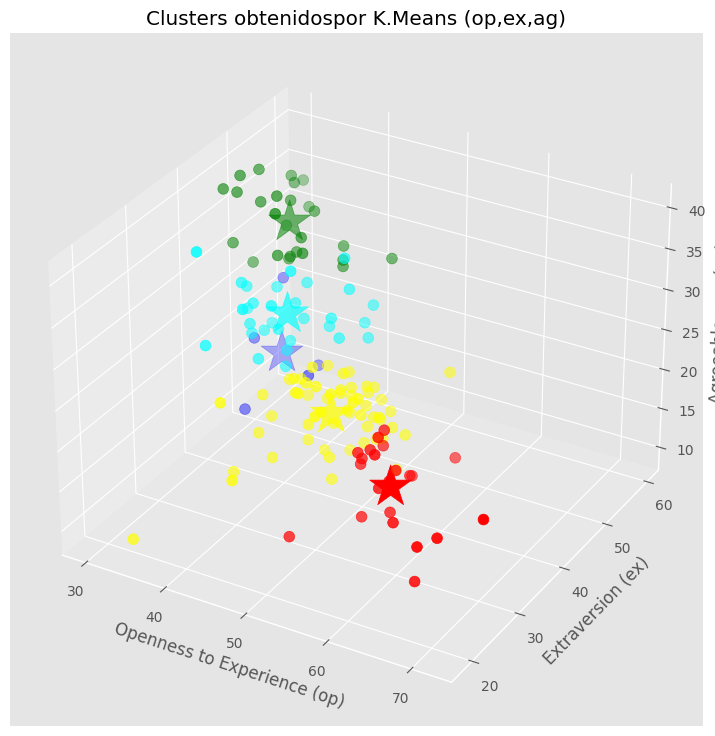

In [ ]:
#Prediciendo los clústers
labels=kmeans.predict(X)
#Colocando los puntos junto con los clusters
colores=["blue","red","green","cyan","yellow"]
asignar=[]
for row in labels:
  asignar.append(colores[row])

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],X[:,2],c=asignar,s=60)
ax.scatter(C[:,0],C[:,1],C[:,2],marker="*",color=colores, s=1000)
ax.set_xlabel("Openness to Experience (op)")
ax.set_ylabel("Extraversion (ex)")
ax.set_zlabel("Agreeableness (ag)")
ax.set_title("Clusters obtenidospor K.Means (op,ex,ag)")
plt.show()

Se puede observar como KMeans ha agrupado 140 usuario de X en 5 Clusters de acuerdo ala personalidad de Openess, Extraversion y Agreeableness.

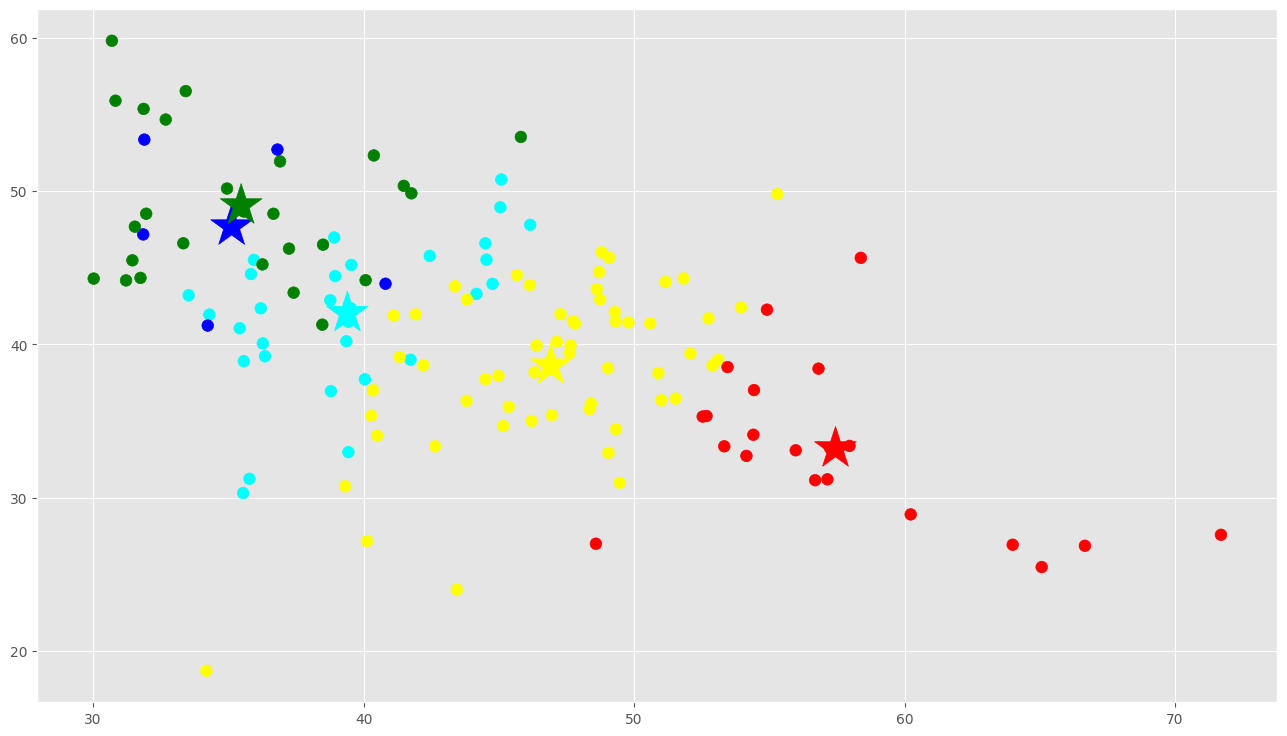

In [ ]:
#Graficando op vs ex
f1=dataframe["op"].values
f2=dataframe["ex"].values

plt.scatter(f1,f2,c=asignar,s=70)
plt.scatter(C[:,0],C[:,1],marker="*",color=colores,s=1000)

In [ ]:
copy=pd.DataFrame(dataframe)
copy["usuario"]=dataframe["usuario"].values
copy["categoria"]=dataframe["categoria"].values
copy["label"]=labels;
cantidadGrupo=pd.DataFrame()
cantidadGrupo["Color"]=colores
cantidadGrupo["Cantidad"]=copy.groupby("label").size()
cantidadGrupo

,Color,Cantidad
0,blue,5
1,red,22
2,green,26
3,cyan,30
4,yellow,57


Para finalizar, se debe categorizar cada grupo con respecto a sus profesiones. Para este ejemplo, se va a identificar cuántas de esas profesiones pertenecen al clúster rojo(0)

In [ ]:
group_referrer_index=copy["label"]==0
group_referrals = copy[group_referrer_index]

diversidadGrupo=pd.DataFrame()
diversidadGrupo["categoria"]=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo["cantidad"]=group_referrals.groupby("categoria").size()
diversidadGrupo


,categoria,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,4.0
8,8,1.0
9,9,NaN


Distancias: Euclidiana(por defecto, Manhattan, Lavenshtein, Mahalanobis)

In [ ]:
#Para ver el representante de cada clúster (el más cercano)
closest,_ = pairwise_distances_argmin_min(kmeans.cluster_centers_,X)
closest

array([ 6, 75, 35, 65, 29])

In [ ]:
user = dataframe["usuario"].values
for row in closest:
  print(user[row])

andresiniesta8
JLo
DaniMateoAgain
iescolar
CindyCrawford


In [ ]:
X_new=np.array([[45.92,57.74,15.66]])##davidguetta

new_labels=kmeans.predict(X_new)
print(new_labels)

[0]
